<a href="https://colab.research.google.com/github/bhanu-v/Detecting-Depression-in-Tweets/blob/master/Copy_of_Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import os
from collections import Counter
import logging
import time
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [0]:
# parameters
FILTER_STEM = True
TRAIN_PORTION = 0.8
RANDOM_STATE = 7

In [10]:
tweets = pd.read_csv('newtweets.csv', encoding="utf-8")
tweets.head(20)


,id,message,label
0,106.0,just had a real good moment. i missssssssss hi...,0
1,217.0,is reading manga http://plurk.com/p/mzp1e,0
2,220.0,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288.0,@lapcat Need to send 'em to my accountant tomo...,0
4,540.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624.0,so sleepy. good times tonight though,0
6,701.0,"@SilkCharm re: #nbn as someone already said, d...",0
7,808.0,23 or 24Ã¯Â¿Â½C possible today. Nice,0
8,1193.0,nite twitterville workout in the am -ciao,0
9,1324.0,"@daNanner Night, darlin'! Sweet dreams to you",0


In [0]:
#tweets = pd.read_csv('sentiment_tweets3.csv', encoding="ANSI")
#tweets.head(20)


In [0]:


df=tweets

In [15]:
df.label.value_counts()

0    12000
1     2313
Name: label, dtype: int64

In [0]:
df.drop(['id'], axis = 1, inplace = True)

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
%%time
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def filter_stopwords(text):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    if FILTER_STEM:
        return " ".join([stemmer.stem(token) for token in text.split() if token not in stop_words])
    else:
        return " ".join([token for token in text.split() if token not in stop_words])
df.message = df.message.apply(filter_stopwords)

CPU times: user 1.86 s, sys: 4.04 ms, total: 1.87 s
Wall time: 1.87 s


In [18]:
%%time
vectorizer = TfidfVectorizer()
word_frequency = vectorizer.fit_transform(df.message)

CPU times: user 156 ms, sys: 2.87 ms, total: 159 ms
Wall time: 180 ms


In [19]:
# for not stem
len(vectorizer.get_feature_names())

15769

In [20]:
sample_index = np.random.random(df.shape[0])
X_train, X_test = word_frequency[sample_index <= TRAIN_PORTION, :], word_frequency[sample_index > TRAIN_PORTION, :]
Y_train, Y_test = df.label[sample_index <= TRAIN_PORTION], df.label[sample_index > TRAIN_PORTION]
print(f"shape of training set: X={X_train.shape}, Y={Y_train.shape}")
print(f"shape of test set: X={X_test.shape}, Y={Y_test.shape}")

shape of training set: X=(11467, 15769), Y=(11467,)
shape of test set: X=(2846, 15769), Y=(2846,)


In [23]:
%%time
clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial').fit(X_train, Y_train)

CPU times: user 97.3 ms, sys: 1.92 ms, total: 99.3 ms
Wall time: 105 ms


In [24]:
Y_predit = clf.predict(X_test)
sum(Y_predit == Y_test) / len(Y_test)

0.9838369641602249

In [25]:

from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,Y_predit)
print(matrix)
print(classification_report(Y_test,Y_predit))
print(roc_auc_score(Y_test,Y_predit))

[[2380    5]
 [  41  420]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2385
           1       0.99      0.91      0.95       461

    accuracy                           0.98      2846
   macro avg       0.99      0.95      0.97      2846
weighted avg       0.98      0.98      0.98      2846

0.9544832353329059


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
pred=clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[2377    8]
 [  13  448]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2385
           1       0.98      0.97      0.98       461

    accuracy                           0.99      2846
   macro avg       0.99      0.98      0.99      2846
weighted avg       0.99      0.99      0.99      2846

0.9842230680727795


In [28]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
X_train

<11467x15769 sparse matrix of type '<class 'numpy.float64'>'
	with 87749 stored elements in Compressed Sparse Row format>

In [31]:
Y_train 

0        0
1        0
2        0
3        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
        ..
14276    0
14277    0
14278    0
14279    0
14280    0
14281    0
14282    0
14284    0
14285    0
14286    0
14289    0
14290    0
14291    0
14292    0
14293    0
14294    0
14295    0
14296    0
14299    0
14300    0
14301    0
14302    0
14303    0
14305    0
14306    0
14307    0
14308    0
14310    0
14311    0
14312    0
Name: label, Length: 11467, dtype: int64

In [0]:
Y_train

0        0
1        0
2        0
3        0
4        0
8        0
9        0
10       0
11       0
12       0
14       0
15       0
16       0
17       0
18       0
20       0
21       0
22       0
23       0
24       0
26       0
27       0
28       0
29       0
30       0
32       0
33       0
34       0
35       0
36       0
        ..
10278    1
10279    1
10280    1
10281    1
10282    1
10283    1
10284    1
10285    1
10286    1
10287    1
10290    1
10291    1
10292    1
10294    1
10295    1
10296    1
10297    1
10298    1
10299    1
10300    1
10301    1
10302    1
10304    1
10305    1
10306    1
10307    1
10308    1
10310    1
10311    1
10312    1
Name: label, Length: 8259, dtype: int64

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(X_train, Y_train)

TypeError: ignored

In [0]:
from sklearn.pipeline import make_pipeline

In [35]:
from sklearn.preprocessing import FunctionTransformer
pipeline = make_pipeline( FunctionTransformer(lambda x:x.todense(), accept_sparse = True),GaussianNB())
pipeline.fit(X_train,Y_train)
pred=pipeline.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [36]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[1335 1050]
 [ 112  349]]
              precision    recall  f1-score   support

           0       0.92      0.56      0.70      2385
           1       0.25      0.76      0.38       461

    accuracy                           0.59      2846
   macro avg       0.59      0.66      0.54      2846
weighted avg       0.81      0.59      0.64      2846

0.658399159606543


In [0]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf = clf.fit(X_train, Y_train)  


In [0]:
pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[2380    5]
 [  23  438]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2385
           1       0.99      0.95      0.97       461

    accuracy                           0.99      2846
   macro avg       0.99      0.97      0.98      2846
weighted avg       0.99      0.99      0.99      2846

0.974006011905574


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=300)
neigh.fit(X_train, Y_train) 
#KNeighborsClassifier(...)
pred = neigh.predict(X_test)


In [43]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[2383    2]
 [ 293  168]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2385
           1       0.99      0.36      0.53       461

    accuracy                           0.90      2846
   macro avg       0.94      0.68      0.74      2846
weighted avg       0.91      0.90      0.88      2846

0.6817932941331624


In [0]:
from xgboost import XGBClassifier

In [45]:
neigh = XGBClassifier()
neigh.fit(X_train, Y_train) 
#KNeighborsClassifier(...)
pred = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[2379    6]
 [  13  448]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2385
           1       0.99      0.97      0.98       461

    accuracy                           0.99      2846
   macro avg       0.99      0.98      0.99      2846
weighted avg       0.99      0.99      0.99      2846

0.9846423552845196


In [0]:
list=[0.9544832353329059,0.9842230680727795,0.658399159606543,0.974006011905574,0.6817932941331624,0.9846423552845196]

In [0]:
nhg=["log","dec","naive","svm","knn","xgb"]

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

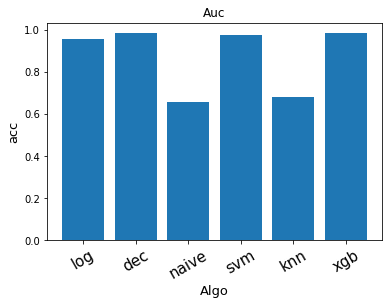

In [58]:
#index = np.arange(len(label))
plt.bar(nhg, list)
plt.xlabel('Algo', fontsize=13)
plt.ylabel('acc', fontsize=13)
plt.xticks(nhg, fontsize=15, rotation=30)
plt.title('Auc')
plt.show()